In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [30]:
df=pd.read_csv('/Users/apple/Downloads/dataset_diabetes_diabetic_data.csv')
df

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70175,100677726,AfricanAmerican,Female,[80-90),1,3,7,7,60,0,17,0,1,1,491,707,250,9,No,No
70176,38726739,AfricanAmerican,Female,[70-80),1,1,7,3,57,4,11,0,0,1,786,414,424,9,No,No
70177,58160520,AfricanAmerican,Male,[90-100),1,3,7,4,21,1,8,0,0,1,820,427,276,9,No,No
70178,43686936,Caucasian,Female,[80-90),1,1,7,1,49,0,12,0,0,0,427,428,428,9,No,No


In [31]:
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

In [32]:
df=df.drop(['diag_1','diag_2','diag_3'],axis=1)

In [33]:
df.apply(lambda serie: serie.eq('?').sum(), axis=0)

patient_nbr                    0
race                        1461
gender                         0
age                            0
admission_type_id              0
discharge_disposition_id       0
admission_source_id            0
time_in_hospital               0
num_lab_procedures             0
num_procedures                 0
num_medications                0
number_outpatient              0
number_emergency               0
number_inpatient               0
number_diagnoses               0
change                         0
diabatic                       0
dtype: int64

In [34]:
df.shape

(70180, 17)

In [35]:
df.drop_duplicates(keep='first',inplace=True)
df=df.drop(['patient_nbr'],axis=1)
df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,1,No,No
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,9,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,6,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,7,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,5,Ch,Yes


In [36]:
df.shape

(70180, 16)

In [52]:
Dup_Rows=df[df.duplicated()]

print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))



Duplicate Rows : 
        race  gender  age  admission_type_id  discharge_disposition_id  \
4722      1       0    1                  1                         1   
17298     3       0    2                  3                         1   
18111     3       1    7                  1                        18   
23475     3       1    0                  1                         1   
23932     1       0    5                  1                         1   
34892     1       0    5                  1                         1   
41130     3       0    5                  1                         1   
44590     3       1    7                  1                         1   
54543     3       1    8                  1                         1   
56744     1       1    7                  1                         1   
59066     3       1    7                  1                         1   
61728     1       1    4                  1                         1   
62044     3       1    7      

In [53]:
df.drop_duplicates(keep='first',inplace=True)

<AxesSubplot:>

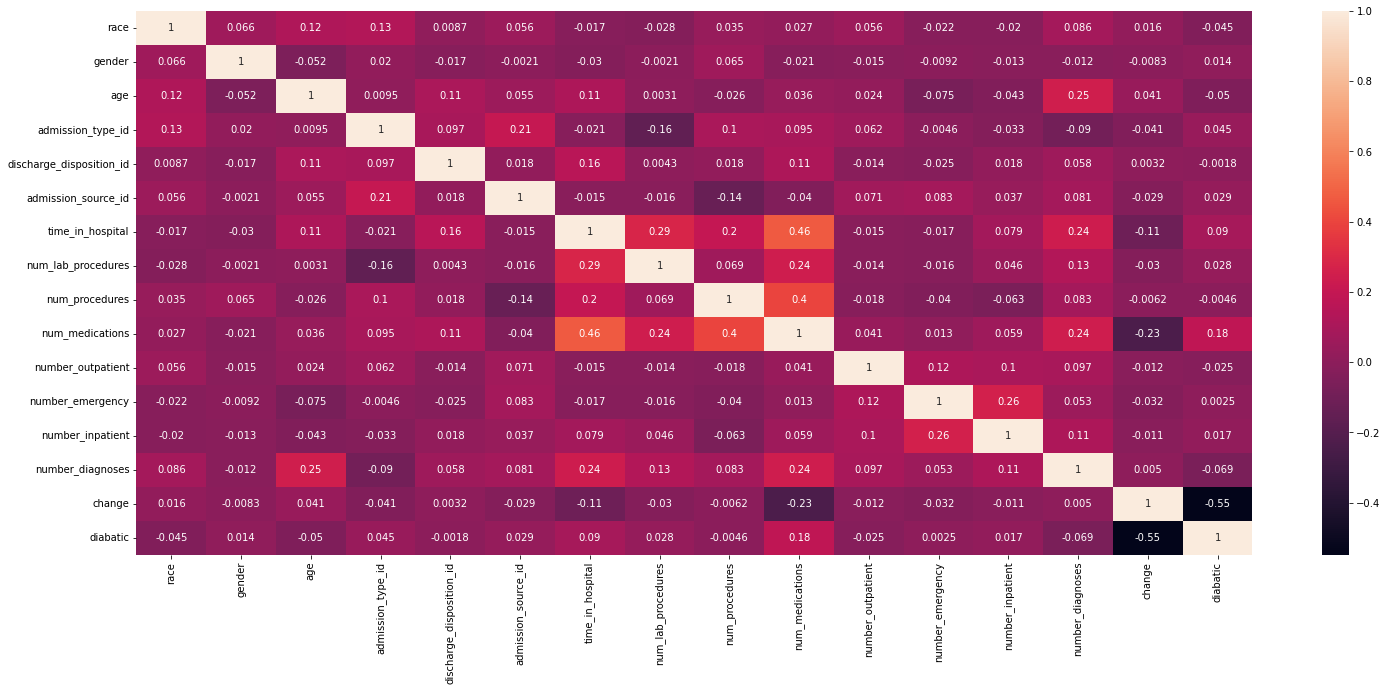

In [54]:
import seaborn as sns
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot = True)

In [57]:
df["race"].replace("?",np.nan,inplace = True)
df.dropna(subset = ["race"],inplace = True)

In [58]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [59]:
df['gender']= label_encoder.fit_transform(df['gender'])
df['race']= label_encoder.fit_transform(df['race'])
df['age']= label_encoder.fit_transform(df['age'])
df['change']= label_encoder.fit_transform(df['change'])
df['diabatic']= label_encoder.fit_transform(df['diabatic'])

In [60]:
df

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change,diabatic
0,3,0,0,6,25,1,1,41,0,1,0,0,0,1,1,0
1,3,0,1,1,1,7,3,59,0,18,0,0,0,9,0,1
2,1,0,2,1,1,7,2,11,5,13,2,0,1,6,1,1
3,3,1,3,1,1,7,2,44,1,16,0,0,0,7,0,1
4,3,1,4,1,1,7,1,51,0,8,0,0,0,5,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70174,3,0,8,1,3,7,4,44,0,17,0,0,2,9,1,0
70175,1,0,8,1,3,7,7,60,0,17,0,1,1,9,1,0
70176,1,0,7,1,1,7,3,57,4,11,0,0,1,9,1,0
70177,1,1,9,1,3,7,4,21,1,8,0,0,1,9,1,0


In [61]:
Y=df['diabatic']
Y

0        0
1        1
2        1
3        1
4        1
        ..
70174    0
70175    0
70176    0
70177    0
70179    0
Name: diabatic, Length: 70158, dtype: int64

In [62]:
X=df.drop(['diabatic'],axis=1)
X

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,change
0,3,0,0,6,25,1,1,41,0,1,0,0,0,1,1
1,3,0,1,1,1,7,3,59,0,18,0,0,0,9,0
2,1,0,2,1,1,7,2,11,5,13,2,0,1,6,1
3,3,1,3,1,1,7,2,44,1,16,0,0,0,7,0
4,3,1,4,1,1,7,1,51,0,8,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70174,3,0,8,1,3,7,4,44,0,17,0,0,2,9,1
70175,1,0,8,1,3,7,7,60,0,17,0,1,1,9,1
70176,1,0,7,1,1,7,3,57,4,11,0,0,1,9,1
70177,1,1,9,1,3,7,4,21,1,8,0,0,1,9,1


### Decision Tree

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=10)

In [69]:
DTC= DecisionTreeClassifier()

In [70]:
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [71]:
y_pred = DTC.predict(X_test)

In [72]:
accuracy_score(y_pred,Y_test)

0.7122291904218928

In [73]:
confusion_matrix(Y_test,DTC.predict(X_test))

array([[ 3907,  3027],
       [ 3030, 11084]])

### Random Forest 

In [74]:
from sklearn.model_selection import train_test_split

In [75]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0)

In [76]:
rf.fit(X_train,Y_train)
y_pred=rf.predict(X_test)

In [77]:
from sklearn.metrics import accuracy_score

In [78]:
accuracy_score(Y_test,y_pred)

0.7469355758266819

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [80]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[3213 1445]
 [2106 7268]]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64      4658
           1       0.83      0.78      0.80      9374

    accuracy                           0.75     14032
   macro avg       0.72      0.73      0.72     14032
weighted avg       0.76      0.75      0.75     14032



### GridSearchCV

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
dtree_model=DecisionTreeClassifier()
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)
dtree_gscv.fit(X, Y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [83]:
dtree_gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [84]:
scores = dtree_gscv.cv_results_
scores["mean_test_score"]

array([0.70406917, 0.69819685, 0.70267243, 0.71005551, 0.7089438 ,
       0.70706246, 0.70033463, 0.700121  , 0.69620114, 0.69603015,
       0.69454774, 0.69476145, 0.70496722, 0.7000213 , 0.70188847,
       0.71015529, 0.70989875, 0.70371296, 0.70701973, 0.69778335,
       0.696814  , 0.69707072, 0.69433403, 0.69574505])

In [85]:
dtree_gscv.score(X_test,Y_test)

0.7419469783352337

In [87]:
confusion_matrix(Y_test,dtree_gscv.predict(X_test))

array([[2972, 1686],
       [1935, 7439]])